# Simulation Result Analysor

In [1]:
from datetime import timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc

matplotlib.font_manager._rebuild()

sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.6, rc=paper_rc)
current_palette = sns.color_palette()

pd.set_option("display.max_columns", None)

save = True
experiment_name = "Philly"
log_dir = f"../log/{experiment_name}"
placer = "consolidate"

jct_avg = pd.read_csv(f"{log_dir}/jct_avg_{placer}.csv", index_col=0)
que_avg = pd.read_csv(f"{log_dir}/que_avg_{placer}.csv", index_col=0)

In [2]:
jct_avg

,fifo_consolidate,sjf_consolidate,srtf_consolidate,qssf_consolidate
6214e9,97501,23337,19532,26022
7f04ca,133826,133271,132980,133941
11cb48,82540,14444,9057,21051
b436b2,28732,28610,28291,28642
ee9e8c,243144,130493,122609,132367
e13805,87265,85949,85314,85886
6c71a0,31088,31030,31020,31019
2869ce,70215,56388,53128,58088
ed69ec,28345,28346,28346,28346
103959,24743,23283,22735,23219


In [3]:
que_avg

,fifo_consolidate,sjf_consolidate,srtf_consolidate,qssf_consolidate
6214e9,78659,4494,685,7179
7f04ca,1412,857,565,1527
11cb48,74040,5944,554,12550
b436b2,544,421,100,454
ee9e8c,127270,14619,6720,16493
e13805,2331,1015,378,953
6c71a0,220,162,150,151
2869ce,21171,7344,4071,9044
ed69ec,28,28,27,28
103959,2391,932,380,867


## Bar: Queue Time

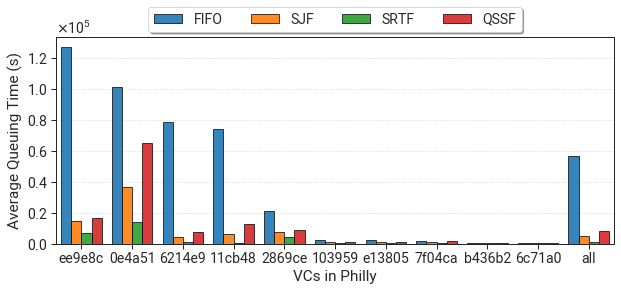

In [4]:
def bar_policies_comparison(df, xlabel, save):
    fig, ax = plt.subplots(figsize=(10, 3.8))
    off = 0.25 * (len(df) - 5)
    x = np.arange(1, len(df) + 1)
    width = 0.2

    labels = []
    for c in df.columns:
        labels.append(c.split("_")[0])
    placer = c.split("_")[1]

    for i in range(len(df.columns)):
        offset = i - off
        p1 = ax.bar(
            x + offset * width,
            df.iloc[:, i],
            width,
            alpha=0.9,
            linewidth=0.8,
            edgecolor="k",
            label=labels[i].upper(),
        )
    #         autolabel(p1, ax)

    ax.set_xlabel(f"{xlabel}")
    ax.set_ylabel(f"Average Queuing Time (s)")
    ax.set_xticks(x)
    ax.set_xlim(0.5, 11.5)
    ax.set_xticklabels(df.index.values)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(-6, 2), useMathText=True)
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.18),
        ncol=8,
        fancybox=True,
        shadow=True,
    )
    ax.grid(axis="y", linestyle=":")
    #     plt.suptitle(f'{experiment_name}_{xlabel}_{placer}')
    if save:
        fig.savefig(
            f"philly_bar_vc_queuetime.pdf", bbox_inches="tight", dpi=600
        )

all_que = que_avg.loc['all']
que_avg = que_avg.drop(index='all')
que_avg.sort_values(by='fifo_consolidate', ascending=False, inplace=True)
que_avg = que_avg.head(10)
que_avg = que_avg.append(all_que)

bar_policies_comparison(que_avg, xlabel=f"VCs in Philly", save=save)